> # Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import chain # for List Operations


## ML Models 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

> ##  Load Dataset

In [ ]:
data_1 = pd.read_csv('/content/russia_losses_equipment.csv')
data_2 = pd.read_csv('/content/russia_losses_personnel.csv')


## Preview Data

In [ ]:
data_1.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [ ]:
data_2.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [ ]:
print(data_1.shape)
print(data_2.shape)

(57, 15)
(57, 5)


* ### From the Previous information, data_1, and data_2 were compare in the number of rows and they related together at the describtion of columns as [day, and date] columns are the same labels informations.

* ### So i'll merge two data into a new one contain informations of both them.

In [ ]:
data = pd.merge(data_1, data_2[["personnel", "personnel*", "POW"]], on=data_1.day, how="right") 
data = data.drop(['key_0'],axis = 1)

In [ ]:
data

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN,5710,about,200
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,NaN,NaN,5840,about,200
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,NaN,NaN,9000,about,200
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,NaN,NaN,9166,about,200
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,NaN,NaN,10000,about,216
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,NaN,NaN,11000,about,232


> ## Cleaning Data

In [ ]:
data.shape

(57, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   57 non-null     object 
 1   day                    57 non-null     int64  
 2   aircraft               57 non-null     int64  
 3   helicopter             57 non-null     int64  
 4   tank                   57 non-null     int64  
 5   APC                    57 non-null     int64  
 6   field artillery        57 non-null     int64  
 7   MRL                    57 non-null     int64  
 8   military auto          57 non-null     int64  
 9   fuel tank              57 non-null     int64  
 10  drone                  57 non-null     int64  
 11  naval ship             57 non-null     int64  
 12  anti-aircraft warfare  57 non-null     int64  
 13  special equipment      38 non-null     float64
 14  mobile SRBM system     28 non-null     float64
 15  personne

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
day,57.0,30.000000,16.598193,2.0,16.00,30.0,44.0,58.0
aircraft,57.0,105.596491,50.501365,10.0,57.00,115.0,150.0,176.0
helicopter,57.0,106.947368,41.331595,7.0,83.00,125.0,135.0,153.0
tank,57.0,518.771930,210.311675,80.0,353.00,561.0,700.0,838.0
APC,57.0,1518.719298,439.124159,516.0,1165.00,1625.0,1891.0,2162.0
field artillery,57.0,244.298246,111.923916,49.0,125.00,291.0,333.0,397.0
MRL,57.0,82.719298,34.745891,4.0,58.00,90.0,108.0,138.0
military auto,57.0,965.421053,438.258972,100.0,558.00,1089.0,1361.0,1523.0
fuel tank,57.0,68.385965,7.603463,60.0,60.00,72.0,76.0,76.0
drone,57.0,61.684211,56.574590,0.0,7.00,53.0,112.0,172.0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
personnel                 0
personnel*                0
POW                       0
dtype: int64

In [ ]:
data[['special equipment','mobile SRBM system']].mode()

,special equipment,mobile SRBM system
0,25.0,4.0


In [ ]:
data[['special equipment','mobile SRBM system']].mean()

special equipment     21.473684
mobile SRBM system     3.928571
dtype: float64

In [ ]:
data['mobile SRBM system'].value_counts()

4.0    27
2.0     1
Name: mobile SRBM system, dtype: int64

In [ ]:
data['special equipment'].value_counts()

25.0    12
27.0     6
21.0     4
24.0     3
10.0     2
11.0     2
15.0     2
12.0     1
13.0     1
16.0     1
18.0     1
19.0     1
22.0     1
26.0     1
Name: special equipment, dtype: int64

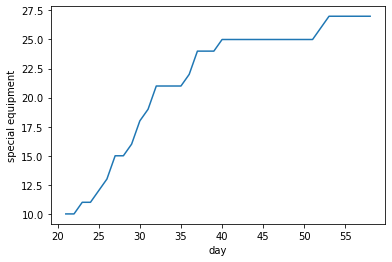

In [ ]:
sns.lineplot(y="special equipment", x = 'day',
             data=data)

## From the previous observation, i faced two problems:
###      1. Filling empty rows at [mobile SRBM system] column.
###    2.  Filling empty rows at [special equipment] column.

> ### Solve the first problem from the obsernation of values of lables of it, showing there were two main values and using the describtion of datam we will see the central tendcy characterstics describe range of it's column between two values [4,2] , and half number of rows contain one of these values and one of the second half contain the other valus, so fill empty values using the second value. 

In [ ]:
data['mobile SRBM system'].fillna('2.0',inplace = True)
data['mobile SRBM system'].astype(float)

0     2.0
1     2.0
2     2.0
3     2.0
4     2.0
5     2.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    2.0
15    2.0
16    2.0
17    2.0
18    2.0
19    2.0
20    2.0
21    2.0
22    2.0
23    2.0
24    2.0
25    2.0
26    2.0
27    2.0
28    2.0
29    2.0
30    4.0
31    4.0
32    4.0
33    4.0
34    4.0
35    4.0
36    4.0
37    4.0
38    4.0
39    4.0
40    4.0
41    4.0
42    4.0
43    4.0
44    4.0
45    4.0
46    4.0
47    4.0
48    4.0
49    4.0
50    4.0
51    4.0
52    4.0
53    4.0
54    4.0
55    4.0
56    4.0
Name: mobile SRBM system, dtype: float64

> ### and the second problem, i create a plot show the variance of values at [Special equipment] column , and using some iformation like central tendency show more informations. 
> 
> ### i'll fill empty values labels using linear prediction and ensamble prediction, define new 2 set of data for training and validation, filling the emplty rows with model  created

### Data for training

In [84]:
new = data.iloc[19:,:]
new.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
19,19,21,84,108,430,1375,190,70,819,60,11,3,43,10,2,13800,0,389
20,20,22,86,108,444,1435,201,72,864,60,11,3,43,10,2,14000,0,405
21,21,23,93,112,450,1448,205,72,879,60,12,3,43,11,2,14200,0,405
22,22,24,95,115,466,1470,213,72,914,60,17,3,44,11,2,14400,0,405
23,23,25,96,118,476,1487,230,74,947,60,21,3,44,12,2,14700,0,405


### Data for prediction

In [ ]:
new_ = data.iloc[0:19,:]
new_.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,2.0,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,2.0,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,2.0,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,2.0,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,2.0,5710,about,200


In [ ]:
la = LabelEncoder()
new['date'] = la.fit_transform(new['date'])
new['personnel*'] = la.fit_transform(new['personnel*'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
new.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
19,0,21,84,108,430,1375,190,70,819,60,11,3,43,10.0,2.0,13800,0,389
20,1,22,86,108,444,1435,201,72,864,60,11,3,43,10.0,2.0,14000,0,405
21,2,23,93,112,450,1448,205,72,879,60,12,3,43,11.0,2.0,14200,0,405
22,3,24,95,115,466,1470,213,72,914,60,17,3,44,11.0,2.0,14400,0,405
23,4,25,96,118,476,1487,230,74,947,60,21,3,44,12.0,2.0,14700,0,405


In [ ]:
x = new.drop('special equipment',axis = 1).values
y = new['special equipment'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
regression_results(y_test,tree.predict(x_test))

explained_variance:  0.9758
mean_squared_log_error:  0.0032
r2:  0.9736
MAE:  0.5
MSE:  0.75
RMSE:  0.866


In [ ]:

reg = LinearRegression()
reg.fit(x, y)
regression_results(y_test,reg.predict(x_test))

explained_variance:  0.9935
mean_squared_log_error:  0.0003
r2:  0.9935
MAE:  0.3522
MSE:  0.1846
RMSE:  0.4296


In [ ]:
new_['date'] = la.fit_transform(new_['date'])
new_['personnel*'] = la.fit_transform(new_['personnel*'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_.drop('special equipment',axis = 1,inplace = True)
predictes = []                                   
special_equipment_tree = []
special_equipment_linear = []
for i in range(0,19):
  predictes.append(new_.iloc[i,:].tolist())
  special_equipment_tree.append(tree.predict(predictes))
  special_equipment_linear.append(reg.predict(predictes))
  predictes = []

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/l

In [ ]:
special_equipment_linear = list(chain.from_iterable(special_equipment_linear))
special_equipment_linear

[-4.114052021059127,
 -2.876589705854556,
 -3.0180067377543285,
 -0.22985613150853368,
 -0.22962903229606013,
 1.4462746951951715,
 1.0587698117365711,
 1.1857623323963438,
 1.4872477911667161,
 1.994509191463937,
 2.630105254155133,
 2.938693375218996,
 2.8648063574049267,
 2.972248536945134,
 3.7641497612752914,
 4.085536365850196,
 5.687375714258252,
 6.31536296065477,
 6.359230368457009]

In [ ]:
special_equipment_tree = list(chain.from_iterable(special_equipment_tree))
special_equipment_tree

[10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0]

In [ ]:
for i in range(0,19):
  data['special equipment'].iloc[i] = special_equipment_linear[i].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Choose the linear prediction as is valid for the previous informatios about [Special equipment] column

In [ ]:
data.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,-4.0,2.0,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,-2.0,2.0,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,-3.0,2.0,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,0.0,2.0,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,0.0,2.0,5710,about,200


In [ ]:
data['special equipment'].replace([-4,-2,-3],0,inplace = True)

In [ ]:
data.head(8)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0.0,2.0,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,0.0,2.0,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,0.0,2.0,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,0.0,2.0,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,0.0,2.0,5710,about,200
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,1.0,2.0,5840,about,200
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,1.0,2.0,9000,about,200
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,1.0,2.0,9166,about,200


# The Data now is cleaned

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
day,57.0,30.000000,16.598193,2.0,16.0,30.0,44.0,58.0
aircraft,57.0,105.596491,50.501365,10.0,57.0,115.0,150.0,176.0
helicopter,57.0,106.947368,41.331595,7.0,83.0,125.0,135.0,153.0
tank,57.0,518.771930,210.311675,80.0,353.0,561.0,700.0,838.0
APC,57.0,1518.719298,439.124159,516.0,1165.0,1625.0,1891.0,2162.0
field artillery,57.0,244.298246,111.923916,49.0,125.0,291.0,333.0,397.0
MRL,57.0,82.719298,34.745891,4.0,58.0,90.0,108.0,138.0
military auto,57.0,965.421053,438.258972,100.0,558.0,1089.0,1361.0,1523.0
fuel tank,57.0,68.385965,7.603463,60.0,60.0,72.0,76.0,76.0
drone,57.0,61.684211,56.574590,0.0,7.0,53.0,112.0,172.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   57 non-null     object 
 1   day                    57 non-null     int64  
 2   aircraft               57 non-null     int64  
 3   helicopter             57 non-null     int64  
 4   tank                   57 non-null     int64  
 5   APC                    57 non-null     int64  
 6   field artillery        57 non-null     int64  
 7   MRL                    57 non-null     int64  
 8   military auto          57 non-null     int64  
 9   fuel tank              57 non-null     int64  
 10  drone                  57 non-null     int64  
 11  naval ship             57 non-null     int64  
 12  anti-aircraft warfare  57 non-null     int64  
 13  special equipment      57 non-null     float64
 14  mobile SRBM system     57 non-null     object 
 15  personne

In [ ]:
data['special equipment'] = data['special equipment'].astype(int)
data['mobile SRBM system'] = data['mobile SRBM system'].astype(float).astype(int)

In [ ]:
data.head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0,2,2800,about,0
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,0,2,4300,about,0
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,0,2,4500,about,0
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,0,2,5300,about,0
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,0,2,5710,about,200
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,1,2,5840,about,200
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,1,2,9000,about,200
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,1,2,9166,about,200
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,1,2,10000,about,216
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,1,2,11000,about,232


> # Visualisation

<Figure size 3024x2880 with 0 Axes>

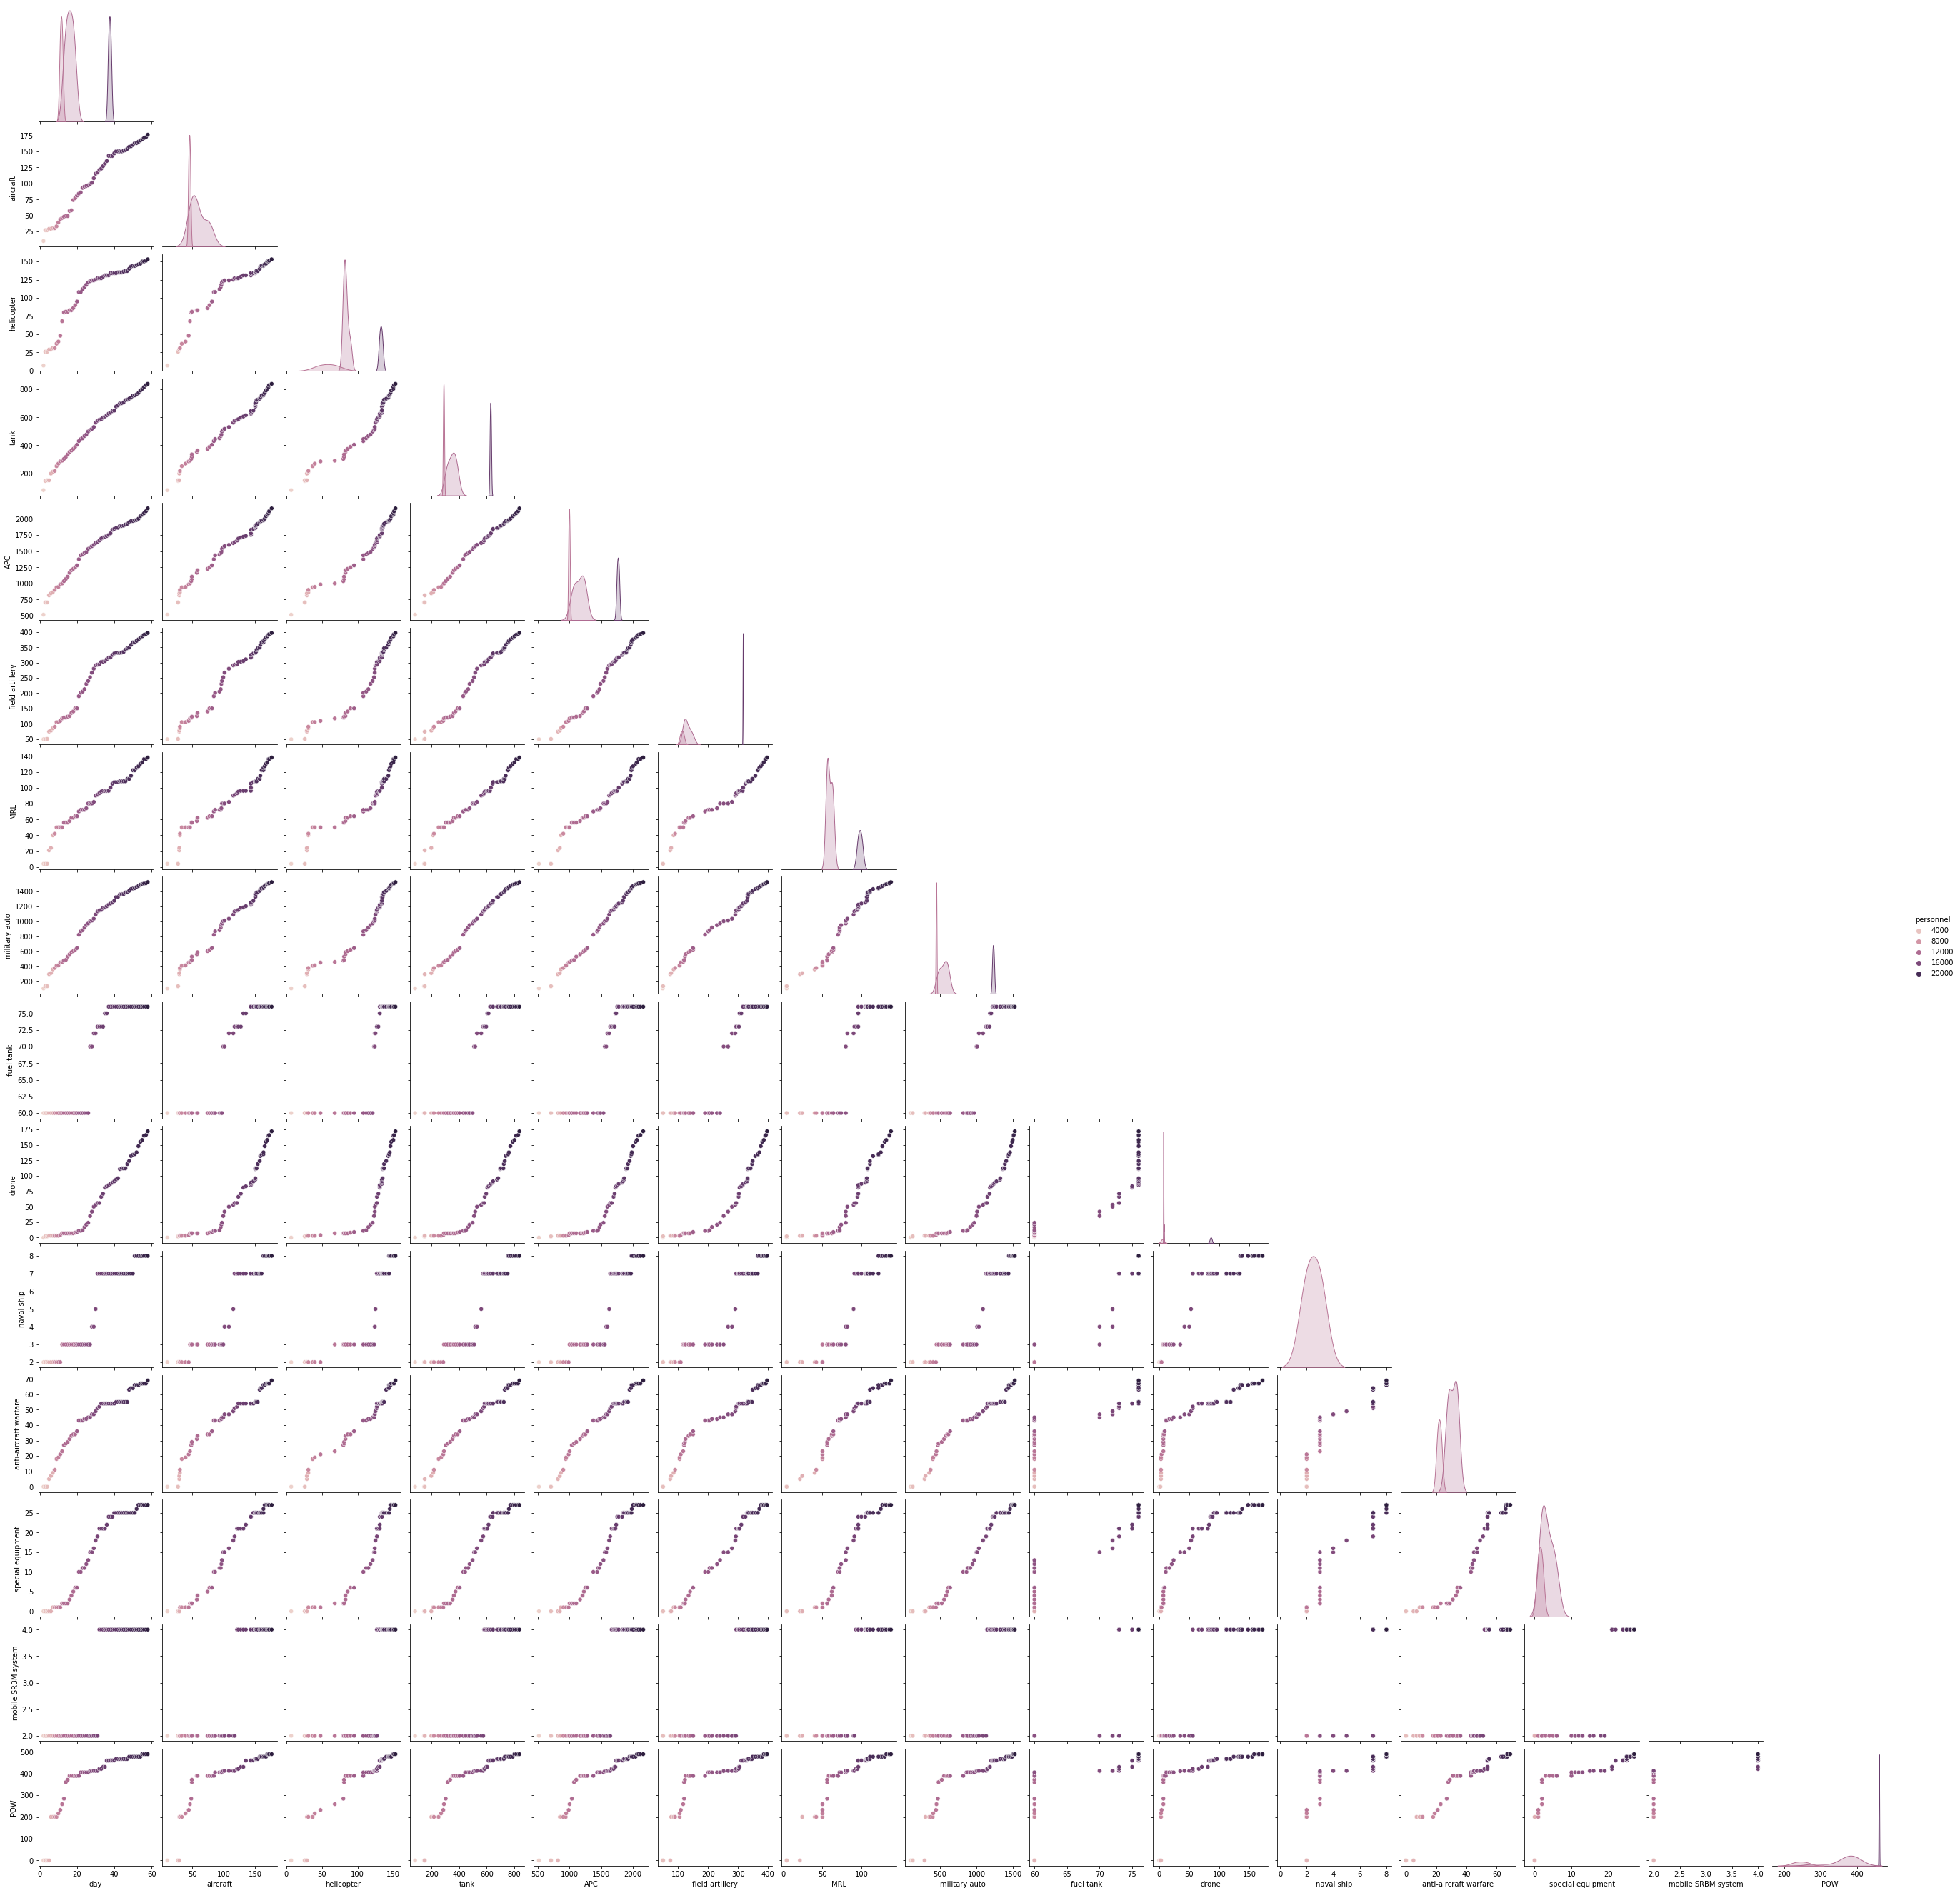

In [ ]:
plt.figure(figsize=(42,40))
sns.pairplot(data, hue="personnel",corner=True)

<Figure size 3600x3600 with 0 Axes>

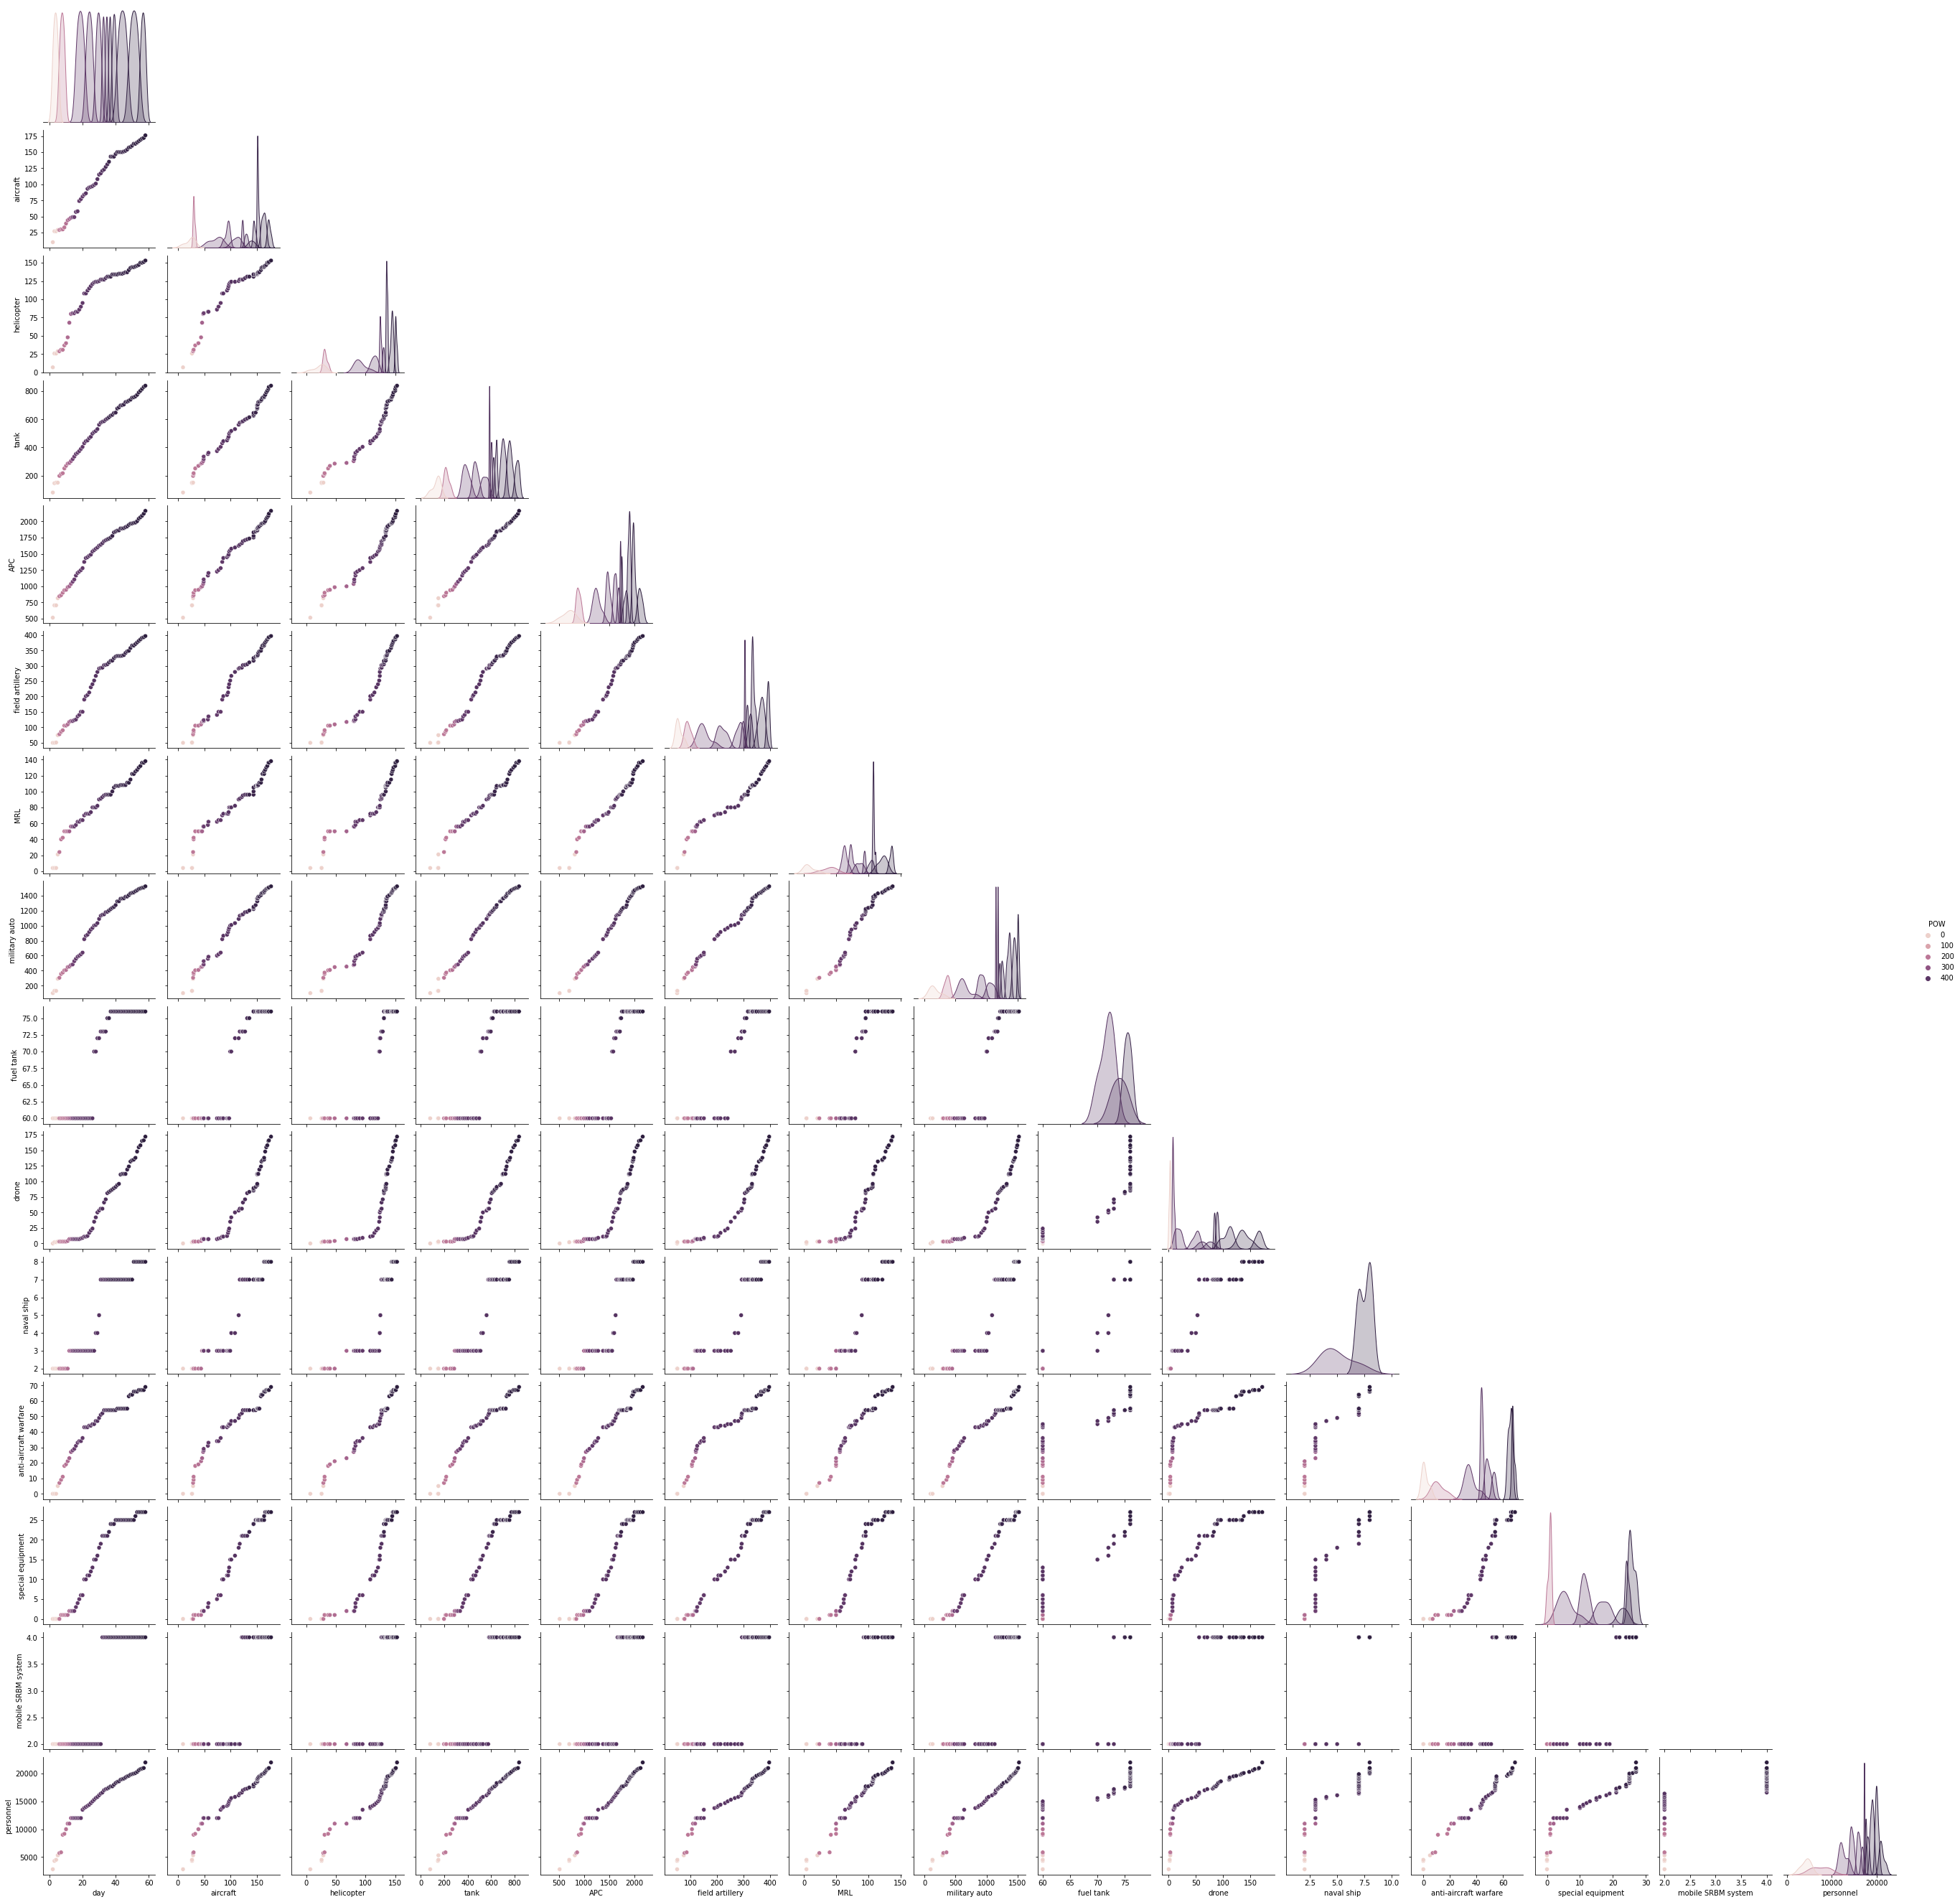

In [ ]:
plt.figure(figsize=(50,50))
sns.pairplot(data, hue="POW",corner=True)

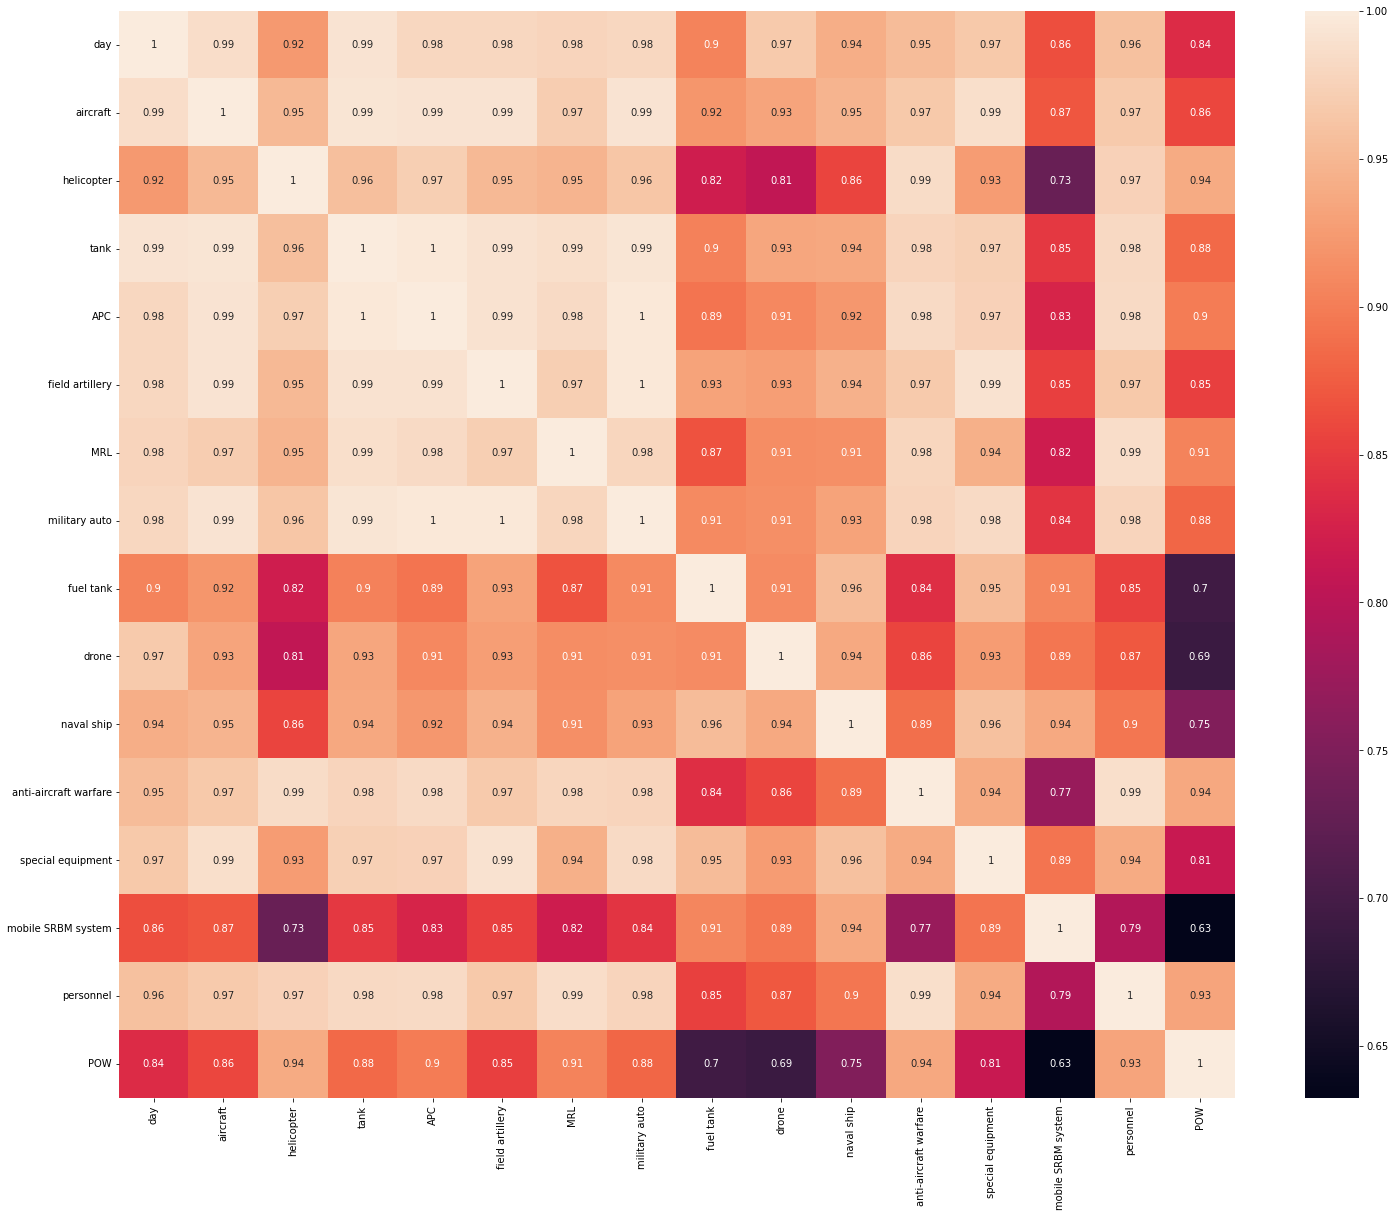

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot=True)

> ## Relation between prisoners of war and personnes

In [ ]:
px.line(data , x='personnel', y="POW", color = 'personnel*').show()

> # Losses Every day

In [ ]:
px.line(data , x='date', y=[ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'personnel','POW']).show()

> ## Relatio between Personnels and the whole forces losses

In [ ]:
px.line(data , x='personnel', y=[ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system','POW']).show()

> ## Air Losses

In [ ]:
 px.line(data, x='day', y= [ 'aircraft', 'helicopter',
          'drone','anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'], markers=True)

## Probability of Air  losses

In [ ]:
px.ecdf(data, y=[ 'aircraft', 'helicopter',
          'drone','anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'])

> ## Infantry losses

In [ ]:
 px.line(data, x='day', y= ['tank', 
       'field artillery', 'MRL', 'military auto', 'fuel tank',
        'special equipment'], markers=True)

In [ ]:
px.ecdf(data, y=['tank', 
       'field artillery', 'MRL', 'military auto', 'fuel tank',
        'special equipment'])

> ## Navy losses

In [ ]:
 px.line(data, x='day', y= 'naval ship', markers=True)

In [ ]:
px.ecdf(data, y= 'naval ship', markers=True)

> ## Prisoners of war every day

In [ ]:
px.line(data, x="day", y="POW", color="personnel*")

In [ ]:
px.line(data, x="day", y=['POW','personnel'], color="personnel*")

In [ ]:
px.ecdf(data, y=['POW','personnel'])

In [ ]:
px.bar(data, x='day', y=[  'tank', 'APC','military auto' ])

In [ ]:
px.line(data, x="day", y=['aircraft','helicopter','drone','naval ship'])

In [ ]:
px.ecdf(data, y=['aircraft','helicopter','drone','naval ship'])

In [ ]:
 px.line(data, "day", y=['aircraft','helicopter','drone','naval ship'], color = 'personnel*',markers=True)

In [ ]:
 px.ecdf(data,  y=['aircraft','helicopter','drone','naval ship'],markers=True)

In [ ]:
 px.line(data, x="day", y=['tank','APC','MRL','military auto','anti-aircraft warfare'], color = 'personnel*',markers=True)

In [ ]:
px.ecdf(data, y=['tank','APC','MRL','military auto','anti-aircraft warfare'])

In [ ]:
px.bar(data, x="day", y=['special equipment','mobile SRBM system','drone'])

In [ ]:
 px.line(data, x="day", y=['special equipment','mobile SRBM system','drone'], color = 'personnel*',markers=True)

In [ ]:
px.ecdf(data, y=['special equipment','mobile SRBM system','drone'])

In [ ]:
 px.area(data, x='POW', y= 'personnel')

In [ ]:
new_data = data[[ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'personnel', 'personnel*' ]]

> # Here i Visualize  the relation of POW and other columns in every axis, using three different types

In [ ]:
for i in new_data.columns:
   px.line(data, y='POW', x= i,color = 'personnel*').show()

In [ ]:
for i in new_data.columns:
   px.bar(data, y='POW', x= i,color = 'personnel*').show()

In [ ]:
for i in new_data.columns:
   px.box(data, y='POW', x= i,color = 'personnel*').show()

In [ ]:
for i in new_data.columns:
   px.histogram(data, y='POW', x= i,marginal="box",color = 'personnel*').show()

In [ ]:
for i in new_data.columns:
   px.scatter(data, y='POW', x= i,color = 'personnel*').show()

> # i'll predict the prisonners of war of the main data

In [ ]:

def regressions_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
data['date'] = la.fit_transform(data['date'])
data['personnel*'] = la.fit_transform(data['personnel*'])

# data['personnel*'] = la.fit_transform(data[])
x = data.drop('POW',axis = 1).values
y = data['POW'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(x, y)
regressions_results(y_test,lr.predict(x_test))

explained_variance:  0.9591
r2:  0.9564
MAE:  23.521
MSE:  1012.9155
RMSE:  31.8263


In [ ]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
regression_results(y_test,tree.predict(x_test))

explained_variance:  0.7589
mean_squared_log_error:  4.6913
r2:  0.6958
MAE:  42.1111
MSE:  7075.5556
RMSE:  84.1163


In [ ]:
data.tail()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW
52,52,54,167,147,790,2041,381,130,1487,76,155,8,67,27,4,20600,0,477
53,53,55,169,150,802,2063,386,132,1495,76,158,8,67,27,4,20800,0,489
54,54,56,171,150,815,2087,391,136,1504,76,165,8,67,27,4,20900,0,489
55,55,57,172,151,829,2118,393,136,1508,76,166,8,67,27,4,21000,0,489
56,56,58,176,153,838,2162,397,138,1523,76,172,8,69,27,4,22000,0,489


In [ ]:
pre = [[81,83,285,255,1239,2542,521,249,2666,106,307,18,101,51,8,32400,0]]

In [ ]:
print(tree.predict(pre))
print(lr.predict(pre))

[489.]
[1154.31430817]
